# Using juncBASE tables of splicing events as input, plot volcano plots to examine global splicing patterns. Then, generate .RNK files for GSEA analysis

# import modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_colwidth', None)
from adjustText import adjust_text

# load dataframes

In [2]:
c1s34flacz_jbPSI = pd.read_csv('Desktop/nonredundant_c1s34flacz.txt', sep='\t')
c1wtkv12_jbPSI = pd.read_csv('Desktop/nonredundant_c1wtkv12.txt', sep='\t')
c1s34fkv12_jbPSI = pd.read_csv('Desktop/nonredundant_c1s34fkv12.txt', sep='\t')

#check dataframe
c1s34fkv12_jbPSI.head(3)

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,chr,strand,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,...,WTK_2_S308,WTK_3_S312,WTL_1_S306,WTL_2_S310,WTL_3_S314,set1_med,set2_med,delta_val,raw_pval,corrected_pval
0,K,alternative_last_exon,"ENSG00000108433.16,ENSG00000262633.2",chr17,+,chr17:46932200-46938598,chr17:46932200-46935028,chr17:46938599-46942020,chr17:46935029-46937696,NaN,...,91.67,90.00,76.92,100.00,100.00,100.00,84.62,-15.38,0.285693,0.735897
1,K,alternative_last_exon,ENSG00000103005.12,chr16,+,"chr16:58010113-58011441,chr16:58010113-58012691;chr16:58010113-58012320",chr16:58010113-58011017,chr16:58012321-58013558,chr16:58011018-58011708,NaN,...,47.62,30.00,35.29,34.62,35.71,35.29,36.84,1.55,0.317276,0.763133
2,K,alternative_last_exon,"ENSG00000204070.10,ENSG00000254806.5",chr20,+,chr20:45365687-45374297;chr20:45365687-45408459;chr20:45365687-45374293,chr20:45365687-45366874,chr20:45408460-45408606;chr20:45374294-45376798,chr20:45366875-45369209,NaN,...,88.10,93.33,91.18,92.86,93.33,92.86,95.56,2.70,0.958599,0.983410


# Remove irrelevant columns

In [3]:
working_c1s34flacz_jbPSI = c1s34flacz_jbPSI.loc[:, c1s34flacz_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions', 
                                                    'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_c1wtkv12_jbPSI = c1wtkv12_jbPSI.loc[:, c1wtkv12_jbPSI.columns.isin(['gene_name', 'corrected_pval', 'raw_pval', 'delta_val', 
                                                   '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                   'as_event_type', 'exclusion_junctions', 'inclusion_junctions', 
                                                    'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_c1s34fkv12_jbPSI = c1s34fkv12_jbPSI.loc[:, c1s34fkv12_jbPSI.columns.isin(['gene_name', 'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions', 
                                                    'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]

working_c1s34flacz_jbPSI.head() 

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
0,K,alternative_last_exon,"ENSG00000108433.16,ENSG00000262633.2",chr17:46932200-46938598,chr17:46932200-46935028,chr17:46938599-46942020,chr17:46935029-46937696,NaN,NaN,-9.09,0.634663,0.815313
1,K,alternative_last_exon,ENSG00000174373.16,chr14:35539691-35549109,chr14:35548539-35549109,chr14:35538352-35539690,chr14:35548508-35548538,NaN,NaN,-6.96,0.632804,0.815313
2,K,alternative_last_exon,ENSG00000267106.7,chr19:9632418-9651892;chr19:9632418-9645073,chr19:9632418-9633459,chr19:9645074-9645489,chr19:9633460-9635446,NaN,NaN,7.14,0.457806,0.722523
3,N,alternative_last_exon,ENSG00000122085.17,chr2:241090400-241099395;chr2:241094433-241099395;chr2:241096439-241099395,chr2:241097428-241099395,chr2:241094277-241094432;chr2:241095130-241096438,chr2:241097187-241097427,NaN,NaN,5.88,0.434674,0.714947
4,K,alternative_last_exon,ENSG00000129197.14,chr17:5426300-5432541,chr17:5426300-5428070,chr17:5432542-5432876,chr17:5428071-5428653,NaN,NaN,5.09,0.343465,0.712363


# Examine known oncogenic splicing events in U2AF1S34F + LACZ
## - PTBP1 [(Huang et al. Medicine (Baltimore) 2022)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9803410/)
## - ASUN [(Federico et al. Int J Mol Sci. 2017)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5454849/)
## - SRSF3 [(Li et al. Front. Oncol. 2020)](https://www.frontiersin.org/journals/oncology/articles/10.3389/fonc.2022.808530/full)


In [13]:
#Make new dataframes, including splice junctions, for viewing loci on IGV

val_c1s34flacz_jbPSI = c1s34flacz_jbPSI.loc[:, c1s34flacz_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions',
                                                        'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions',
                                                                             'neighboring_constitutive_exons'])]
val_c1wtkv12_jbPSI = c1wtkv12_jbPSI.loc[:, c1wtkv12_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions',
                                                        'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions',
                                                                             'neighboring_constitutive_exons'])]
val_c1s34fkv12_jbPSI = c1s34fkv12_jbPSI.loc[:, c1s34fkv12_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions',
                                                        'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions',
                                                                             'neighboring_constitutive_exons'])]

val_c1s34flacz_jbPSI

# list(c1s34fkv12_jbPSI.columns)

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
0,K,jcn_only_AD,"ENSG00000009413.16,ENSG00000083099.11",chr6:89637354-89637741,chr6:89637354-89637724,NaN,chr6:89637725-89637741,chr6:89637741-89637742,NaN,-4.00,0.445093,0.813464
1,N,cassette,ENSG00000214941.8,chr17:15978164-15987265,chr17:15978164-15981039;chr17:15981145-15987265,NaN,chr17:15981040-15981144,NaN,NaN,0.00,0.422650,0.681382
2,K,intron_retention,ENSG00000156253.7,chr21:29008308-29008394,NaN,NaN,NaN,chr21:29008307-29008308;chr21:29008394-29008395,NaN,0.54,0.929800,1.000000
3,N,jcn_only_AD,ENSG00000147144.13,chrX:49062059-49062234;chrX:49062109-49062234;chrX:49062118-49062234;chrX:49062133-49062234,chrX:49062002-49062234,NaN,chrX:49062002-49062058;chrX:49062059-49062108;chrX:49062109-49062117;chrX:49062118-49062132,chrX:49062001-49062002;chrX:49062058-49062059;chrX:49062108-49062109;chrX:49062117-49062118,NaN,-6.67,0.520904,0.829763
4,K,cassette,ENSG00000164885.13,chr7:151055607-151056579,chr7:151055607-151055752;chr7:151055849-151056579,NaN,chr7:151055753-151055848,NaN,NaN,-6.44,0.043975,0.411236
...,...,...,...,...,...,...,...,...,...,...,...,...
27920,N,alternative_donor,"ENSG00000171103.11,ENSG00000174501.14",chr2:28865120-28869578;chr2:28865120-28869661,chr2:28865120-28869559,NaN,chr2:28869560-28869578;chr2:28869579-28869661,chr2:28869578-28869579;chr2:28869661-28869662,NaN,8.66,0.437811,0.815892
27921,N,cassette,ENSG00000120685.20,chr13:39017545-39023051;chr13:39017545-39024472,"chr13:39017545-39022325;chr13:39022413-39023051,chr13:39022413-39024472",NaN,chr13:39022326-39022412,NaN,NaN,2.78,0.507449,0.726846
27922,N,jcn_only_AA,NaN,chr11:62522246-62524003;chr11:62522246-62530663;chr11:62522246-62526127;chr11:62522246-62531794;chr11:62522246-62523619;chr11:62522246-62528281;chr11:62522246-62524975;chr11:62522246-62525359,chr11:62522246-62522629,NaN,NaN,NaN,NaN,44.62,0.266174,0.764194
27923,N,jcn_only_AA,NaN,chr14:104946766-104948250;chr14:104946766-104947260,chr14:104946766-104950725,NaN,NaN,NaN,NaN,0.00,1.000000,1.000000


In [13]:
#ASUN ENSG00000064102.15
#PTBP1 ENSG00000011304.20
#SRSF3 ENSG00000112081.17 

#for clone 1 s34f lacz

valdtdEventsReport =  val_c1s34flacz_jbPSI.loc[(val_c1s34flacz_jbPSI['gene_name'] == 'ENSG00000112081.17') 
                                         | (val_c1s34flacz_jbPSI['gene_name'] == 'ENSG00000064102.15')
                                        | (val_c1s34flacz_jbPSI['gene_name'] == 'ENSG00000011304.20')] 

valdtdEventsReport = valdtdEventsReport.sort_values(by=['raw_pval'])
valdtdEventsReport 
#only 1 event, ENSG00000011304.20 (PTBP1) passes raw p val < 0.05

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
3513,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-805491;chr19:805188-808359;chr19:805188-805527,chr19:805188-806407,NaN,NaN,NaN,NaN,14.05,0.020240,0.492079
13402,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914002-26917351;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914533-26916001,chr12:26914533-26917351",NaN,chr12:26914408-26914532,NaN,NaN,-28.32,0.021067,0.347274
14567,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914579-26916001",NaN,chr12:26914408-26914578,NaN,NaN,-19.52,0.029803,0.372000
13457,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-806407;chr19:805188-808359;chr19:805188-805527,chr19:805188-805491,NaN,NaN,NaN,NaN,-13.19,0.034327,0.575095
7328,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-804650;chr19:804209-804291;chr19:804209-804270,chr19:804209-808649,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,10.64,0.350409,0.758811
11766,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-808649;chr19:804209-804650;chr19:804209-804270,chr19:804209-804291,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,-10.64,0.350409,0.758811
5705,K,cassette,ENSG00000112081.17,chr6:36598984-36601151,chr6:36598984-36599820;chr6:36600277-36601151,NaN,chr6:36599821-36600276,NaN,NaN,-1.99,0.376598,0.681382
11789,N,coord_cassette,ENSG00000112081.17,chr6:36598984-36601707,chr6:36598984-36599820;chr6:36600277-36601151;chr6:36601191-36601707,NaN,chr6:36599821-36600276;chr6:36601152-36601190,NaN,NaN,0.00,0.422650,0.668346
7771,K,alternative_donor,ENSG00000064102.15,chr12:26936815-26938267,chr12:26936815-26937795,NaN,chr12:26937796-26938267,chr12:26938267-26938268,NaN,3.85,0.449443,0.828353
17415,N,alternative_acceptor,ENSG00000064102.15,chr12:26914533-26916001,chr12:26914579-26916001,NaN,chr12:26914533-26914578,chr12:26914532-26914533,NaN,-4.25,0.491893,0.780811


In [14]:
#ASUN ENSG00000064102.15
#PTBP1 ENSG00000011304.20
#SRSF3 ENSG00000112081.17 

#for s34f kv12 clone 1

valdtdEventsReport =  val_c1s34fkv12_jbPSI.loc[(val_c1s34fkv12_jbPSI['gene_name'] == 'ENSG00000112081.17') 
                                         | (val_c1s34fkv12_jbPSI['gene_name'] == 'ENSG00000064102.15')
                                        | (val_c1s34fkv12_jbPSI['gene_name'] == 'ENSG00000011304.20')] 

valdtdEventsReport 


,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
3596,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-805491;chr19:805188-808359;chr19:805188-805527,chr19:805188-806407,NaN,NaN,NaN,NaN,10.79,0.005415,0.706261
5821,K,cassette,ENSG00000112081.17,chr6:36598984-36601151,chr6:36598984-36599820;chr6:36600277-36601151,NaN,chr6:36599821-36600276,NaN,NaN,-2.32,0.378260,0.730218
7497,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-804650;chr19:804209-804291;chr19:804209-804270,chr19:804209-808649,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,10.42,0.377946,0.809182
7958,K,alternative_donor,ENSG00000064102.15,chr12:26936815-26938267,chr12:26936815-26937795,NaN,chr12:26937796-26938267,chr12:26938267-26938268,NaN,3.85,0.559961,0.859891
12047,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-808649;chr19:804209-804650;chr19:804209-804270,chr19:804209-804291,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,-10.42,0.377946,0.809182
12072,N,coord_cassette,ENSG00000112081.17,chr6:36598984-36601707,chr6:36598984-36599820;chr6:36600277-36601151;chr6:36601191-36601707,NaN,chr6:36599821-36600276;chr6:36601152-36601190,NaN,NaN,-21.74,0.352854,0.748988
13733,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914002-26917351;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914533-26916001,chr12:26914533-26917351",NaN,chr12:26914408-26914532,NaN,NaN,-25.39,0.025896,0.551547
13783,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-806407;chr19:805188-808359;chr19:805188-805527,chr19:805188-805491,NaN,NaN,NaN,NaN,-10.95,0.004628,0.706261
14900,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914579-26916001",NaN,chr12:26914408-26914578,NaN,NaN,-16.50,0.028372,0.564465
17869,N,alternative_acceptor,ENSG00000064102.15,chr12:26914533-26916001,chr12:26914579-26916001,NaN,chr12:26914533-26914578,chr12:26914532-26914533,NaN,4.84,0.132418,0.809182



# parse gtf file to convert ensg to gene name

In [4]:
with open ('Desktop/gencode.v33.primary_assembly.annotation.gtf') as f:
    gtf = list(f)

gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_name "' in x]

#grab everything that has gene ID and gene name
#only get lines with gene id and gene name
# gtf = [x for x in gtf if 'gene id "' in x and 'gene_name "' in x]
gtf_list = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
gtfset = set(gtf_list)
gtfdict = dict(gtfset)
len(gtfset)

60721

# Convert ENSG ID to gene names

In [5]:
#convert ENSG IDS to gene names in dataframes

dflist = [working_c1s34flacz_jbPSI, working_c1s34fkv12_jbPSI, working_c1wtkv12_jbPSI]

for df in dflist:
    df['GeneName'] = df['gene_name'].map(gtfdict)

# psi_pvalue_s34fkv12df.tail(5)

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/1182829873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GeneName'] = df['gene_name'].map(gtfdict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/1182829873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GeneName'] = df['gene_name'].map(gtfdict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/1182829873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [10]:
s34flaczNAs = working_c1s34flacz_jbPSI.loc[(working_c1s34flacz_jbPSI['GeneName'].isna()) & 
                                          (working_c1s34flacz_jbPSI['corrected_pval'] < 0.25) &
                                          (working_c1s34flacz_jbPSI['delta_val'] >= 10) &
                                          (working_c1s34flacz_jbPSI['as_event_type'] != 'jcn_only_AA') &
                                          (working_c1s34flacz_jbPSI['as_event_type'] != 'jcn_only_AD')]

s34flaczNAs

#from IGV, the first one (corrected pval 0.157006) is PCLAF
#second one is LINC00623

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval,GeneName
7847,N,cassette,"ENSG00000166803.13,ENSG00000259316.11",chr15:64366076-64380957;chr15:64373765-64380957,"chr15:64366076-64376742,chr15:64373765-64376742;chr15:64376906-64380957",NaN,chr15:64376743-64376905,NaN,NaN,13.52,0.000166,0.157006,NaN
16539,N,alternative_acceptor,NaN,chr1:120952786-120953222,chr1:120952786-120953219,NaN,chr1:120953220-120953222,chr1:120953222-120953223,NaN,12.50,0.000452,0.133467,NaN


In [11]:
wtkv12NAs = working_c1wtkv12_jbPSI.loc[(working_c1wtkv12_jbPSI['GeneName'].isna()) & 
                                          (working_c1wtkv12_jbPSI['corrected_pval'] < 0.25) &
                                          (working_c1wtkv12_jbPSI['delta_val'] >= 10) &
                                          (working_c1wtkv12_jbPSI['as_event_type'] != 'jcn_only_AA') &
                                          (working_c1wtkv12_jbPSI['as_event_type'] != 'jcn_only_AD')]

wtkv12NAs

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval,GeneName


In [12]:
s34fkv12NAs = working_c1s34fkv12_jbPSI.loc[(working_c1s34fkv12_jbPSI['GeneName'].isna()) & 
                                          (working_c1s34fkv12_jbPSI['corrected_pval'] < 0.25) &
                                          (working_c1s34fkv12_jbPSI['delta_val'] >= 10) &
                                          (working_c1s34fkv12_jbPSI['as_event_type'] != 'jcn_only_AA') &
                                          (working_c1s34fkv12_jbPSI['as_event_type'] != 'jcn_only_AD')]

s34fkv12NAs
#LARP1B

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval,GeneName
61,K,alternative_last_exon,"ENSG00000138709.19,ENSG00000164066.13",chr4:128107314-128107886;chr4:128107314-128114569,chr4:128107314-128107882,chr4:128114570-128114742,chr4:128107883-128108901,NaN,NaN,10.4,0.000319,0.145787,NaN


# make volcano plots

In [13]:
#set up dataframes for volcano plots / splicing event type analysis


nojcnonly_s34flacz = working_c1s34flacz_jbPSI.loc[(working_c1s34flacz_jbPSI['as_event_type'] != 'jcn_only_AD') &
                                           (working_c1s34flacz_jbPSI['as_event_type'] != 'jcn_only_AA')]
nojcnonly_wtkv12 = working_c1wtkv12_jbPSI.loc[(working_c1wtkv12_jbPSI['as_event_type'] != 'jcn_only_AD') &
                                           (working_c1wtkv12_jbPSI['as_event_type'] != 'jcn_only_AA')]
nojcnonly_s34fkv12 = working_c1s34fkv12_jbPSI.loc[(working_c1s34fkv12_jbPSI['as_event_type'] != 'jcn_only_AD') &
                                           (working_c1s34fkv12_jbPSI['as_event_type'] != 'jcn_only_AA')]

dflist = [nojcnonly_s34flacz, nojcnonly_wtkv12, nojcnonly_s34fkv12]
for df in dflist:
    df['neglogp'] = -np.log10(df['corrected_pval'])


/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/2634643068.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/2634643068.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/2634643068.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [33]:
#specify coordinates for volcano plot significant dots and coordinates for labeling gene names

sig1 = nojcnonly_s34flacz[(abs(nojcnonly_s34flacz['delta_val'])>=10)&(nojcnonly_s34flacz['neglogp']>0.60205999132)]
sig1text = nojcnonly_s34flacz[(abs(nojcnonly_s34flacz['delta_val'])>=10)&(nojcnonly_s34flacz['neglogp']>0.60205999132)]

sig2 = nojcnonly_wtkv12[(abs(nojcnonly_wtkv12['delta_val'])>=10)&(nojcnonly_wtkv12['neglogp']>0.60205999132)]
sig2text = nojcnonly_wtkv12[(abs(nojcnonly_wtkv12['delta_val'])>=10)&(nojcnonly_wtkv12['neglogp']>0.60205999132)]

sig3 = nojcnonly_s34fkv12[(abs(nojcnonly_s34fkv12['delta_val'])>=10)&(nojcnonly_s34fkv12['neglogp']>0.60205999132)]
sig3text = nojcnonly_s34fkv12[(abs(nojcnonly_s34fkv12['delta_val'])>=10)&(nojcnonly_s34fkv12['neglogp']>0.60205999132)]

In [34]:
NAsig1text = sig1text.loc[(sig1text['GeneName'].isna())]

noNas = sig1text.loc[(sig1text['GeneName'].notna())]

#make dict mapping exclusion junctions to manually found gene names
sig1dict = { 'chr11:43444210-43448001' : 'TCC17', 'chr15:64366076-64380957;chr15:64373765-64380957' : 'PCLAF',
           'chr5:176352749-176361601;chr5:176352749-176359810;chr5:176348357-176359461;chr5:176348357-176359480;chr5:176352749-176359480;chr5:176348357-176361601;chr5:176348357-176359810;chr5:176348357-176359805': 'KIAA1191',
           'chr2:24060927-24063018;chr2:24060927-24063703;chr2:24060927-24065387': 'FKBP1B',
           'chr1:120952786-120953222' : 'LINC00623', 'chr11:65916089-65918450;chr11:65916089-65919779' :'C11orf68',
           'chr1:28683741-28690103' : 'GMEB1'  }

#replace NaN values at these junctions with gene names
NAsig1text['GeneName'] = NAsig1text['exclusion_junctions'].map(sig1dict)

sig1text = pd.concat([NAsig1text, noNas])

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/4155680942.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAsig1text['GeneName'] = NAsig1text['exclusion_junctions'].map(sig1dict)


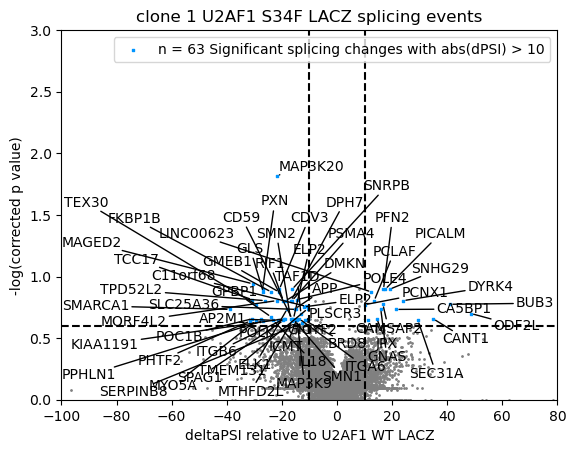

In [37]:
#u2af1 s34f lacz vs wt lacz

plt.scatter(x=nojcnonly_s34flacz['delta_val'],y=nojcnonly_s34flacz['neglogp'], s=1, color='gray')
plt.scatter(x=sig1['delta_val'],y=sig1['neglogp'],s=4,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig1))),
            color='#0095FF', marker = 's')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('clone 1 U2AF1 S34F LACZ splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 3) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig1text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig1text.iloc[i].delta_val, y=sig1text.iloc[i].neglogp, s= sig1text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='upper right', facecolor="white")
plt.savefig("Downloads/clone1dpsi_volcano_s34flacz.pdf", format='pdf', transparent=True)

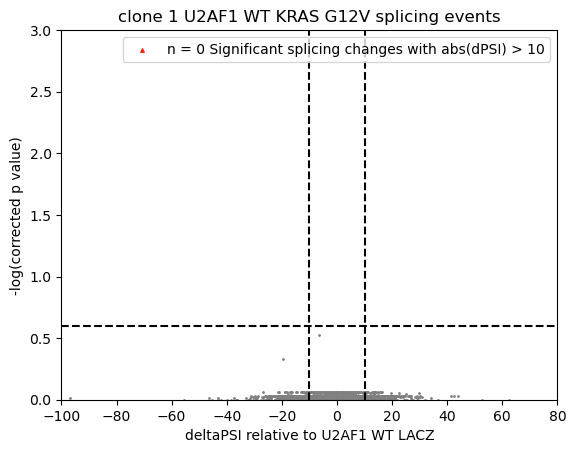

In [45]:
#u2af1 wt kras g12v vs wt lacz

plt.scatter(x=nojcnonly_wtkv12['delta_val'],y=nojcnonly_wtkv12['neglogp'], s=1, color='gray')
plt.scatter(x=sig2['delta_val'],y=sig2['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig2))),
            color='#FF2501', marker='^')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('clone 1 U2AF1 WT KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 3) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig2text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig2text.iloc[i].delta_val, y=sig2text.iloc[i].neglogp, s= sig2text.iloc[i].GeneName))
    
# adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='upper right', facecolor="white")
plt.savefig("Downloads/clone1dpsi_volcano_wtkv12.pdf", format='pdf', transparent=True)

In [40]:
NAsig3text = sig3text.loc[(sig3text['GeneName'].isna())]

noNas = sig3text.loc[(sig3text['GeneName'].notna())]

#make dict mapping exclusion junctions to manually found gene names
sig3dict = { 'chr4:128107314-128107886;chr4:128107314-128114569' : 'LARP1B'  }

#replace NaN values at these junctions with gene names
NAsig3text['GeneName'] = NAsig3text['exclusion_junctions'].map(sig3dict)

sig3text = pd.concat([NAsig3text, noNas])

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_8738/463117388.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAsig3text['GeneName'] = NAsig3text['exclusion_junctions'].map(sig3dict)


In [39]:
sig3text.loc[(sig3text['GeneName'].isna())]

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval,GeneName,neglogp
61,K,alternative_last_exon,"ENSG00000138709.19,ENSG00000164066.13",chr4:128107314-128107886;chr4:128107314-128114569,chr4:128107314-128107882,chr4:128114570-128114742,chr4:128107883-128108901,NaN,NaN,10.4,0.000319,0.145787,NaN,0.836281


In [42]:
sig3text

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval,GeneName,neglogp
61,K,alternative_last_exon,"ENSG00000138709.19,ENSG00000164066.13",chr4:128107314-128107886;chr4:128107314-128114569,chr4:128107314-128107882,chr4:128114570-128114742,chr4:128107883-128108901,NaN,NaN,10.40,0.000319,0.145787,LARP1B,0.836281
9118,N,cassette,ENSG00000135341.18,chr6:90542530-90547257;chr6:90536402-90547257,"chr6:90536402-90544551,chr6:90542530-90544551;chr6:90544633-90547257",NaN,chr6:90544552-90544632,NaN,NaN,14.62,0.000027,0.172456,MAP3K7,0.763322
17296,K,alternative_acceptor,ENSG00000089159.16,chr12:120215274-120215559,chr12:120215418-120215559,NaN,chr12:120215274-120215417,chr12:120215273-120215274,NaN,-19.05,0.000331,0.237934,PXN,0.623543
17573,K,alternative_acceptor,ENSG00000091527.15,chr3:133586723-133588352;chr3:133586723-133587161;chr3:133586723-133587895,chr3:133586723-133587158,NaN,chr3:133587159-133587161;chr3:133587162-133587895;chr3:133587896-133588352,chr3:133587161-133587162;chr3:133587895-133587896;chr3:133588352-133588353,NaN,22.07,0.000242,0.237934,CDV3,0.623543
18557,N,alternative_acceptor,ENSG00000166200.15,chr15:49139091-49139527;chr15:49137438-49139527;chr15:49137486-49139527;chr15:49137423-49139527,chr15:49137459-49139527,NaN,chr15:49137423-49137437;chr15:49137438-49137458;chr15:49137459-49137485;chr15:49137486-49139090,chr15:49137422-49137423;chr15:49137437-49137438;chr15:49137458-49137459;chr15:49137485-49137486,NaN,-15.79,0.000058,0.207741,COPS2,0.682478


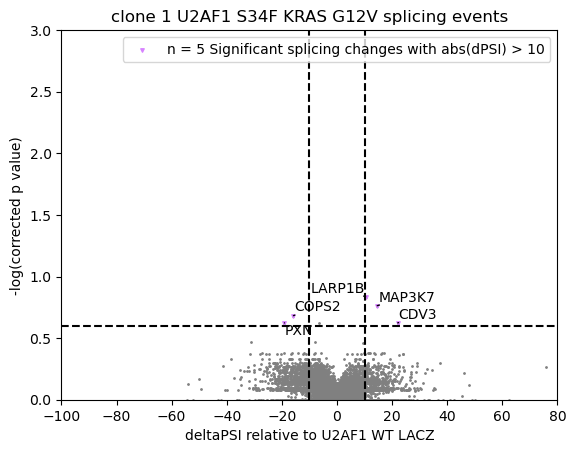

In [44]:
#u2af1 s34f kras g12v vs u2af1 wt lacz
#plot volcano plot with lines marking deltapsi 10 and sig p value

plt.scatter(x=nojcnonly_s34fkv12['delta_val'],y=nojcnonly_s34fkv12['neglogp'], s=1, color='gray')
plt.scatter(x=sig3['delta_val'],y=sig3['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig3))),
            color='#D783FF', marker="v")

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('clone 1 U2AF1 S34F KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 3) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig3)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig3text.iloc[i].delta_val, y=sig3text.iloc[i].neglogp, s= sig3text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='upper right', facecolor="white")
plt.savefig("Downloads/clone1dpsi_volcano_s34fkv12.pdf", format='pdf', transparent=True)

In [7]:
#sort by deltaPSI, then keep the first entry (highest value absdeltaPSI)

#filter data frames by padj < 0.25
c1s34flacz_padj025 = filtered_c1s34flacz_jbPSI.loc[(filtered_c1s34flacz_jbPSI['corrected_pval'] < 0.25)]
c1wtkv12_padj025 = filtered_c1wtkv12_jbPSI.loc[(filtered_c1wtkv12_jbPSI['corrected_pval'] < 0.25)]
c1s34fkv12_padj025 = filtered_c1s34fkv12_jbPSI.loc[(filtered_c1s34fkv12_jbPSI['corrected_pval'] < 0.25)]

#take absolute value of dPSI
dflist = [c1s34flacz_padj025, c1wtkv12_padj025, c1s34fkv12_padj025]
for df in dflist:
    df['abs(dPSI)'] = abs(df['delta_val'])

#for duplciates, keep only highest deltapsi entry
#first sort by descending abspsi

c1s34flacz_padj025 = c1s34flacz_padj025.sort_values(['abs(dPSI)'], ascending=False)
c1wtkv12_padj025 = c1wtkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
c1s34fkv12_padj025 = c1s34fkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
    
#now, keep only the highest of a dup gene entry
c1s34flacz_unique = c1s34flacz_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
c1wtkv12_unique = c1wtkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
c1s34fkv12_unique = c1s34fkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)

#drop transcripts without gene name
c1s34flacz_RNK = c1s34flacz_unique.dropna(subset=['GeneName'])
c1wtkv12_RNK = c1wtkv12_unique.dropna(subset=['GeneName'])
c1s34fkv12_RNK = c1s34fkv12_unique.dropna(subset=['GeneName'])

c1s34flacz_RNK

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3739/4022312710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3739/4022312710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])


,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)
24132,K,jcn_only_AA,ENSG00000187742.15,-52.56,0.001508,0.236574,SECISBP2,0.626033,52.56
27056,K,jcn_only_AA,ENSG00000122417.15,51.39,0.000286,0.168328,ODF2L,0.773844,51.39
15666,N,jcn_only_AA,ENSG00000077514.9,46.67,0.001388,0.236574,POLD3,0.626033,46.67
271,N,jcn_only_AA,ENSG00000154473.18,-42.31,0.000652,0.193110,BUB3,0.714195,42.31
8770,K,cassette,ENSG00000102038.15,-38.91,0.000625,0.184863,SMARCA1,0.733150,38.91
...,...,...,...,...,...,...,...,...,...
3267,K,cassette,ENSG00000214944.9,-5.88,0.001141,0.220383,ARHGEF28,0.656822,5.88
510,K,jcn_only_AA,ENSG00000084072.17,-5.84,0.001489,0.236574,PPIE,0.626033,5.84
1592,K,cassette,ENSG00000100796.17,-5.03,0.000243,0.157006,PPP4R3A,0.804084,5.03
6280,N,cassette,ENSG00000122359.18,4.53,0.001224,0.220383,ANXA11,0.656822,4.53


In [23]:
c1s34flacz_RNK

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)
24132,K,jcn_only_AA,ENSG00000187742.15,-52.56,0.001508,0.236574,SECISBP2,0.626033,52.56
27056,K,jcn_only_AA,ENSG00000122417.15,51.39,0.000286,0.168328,ODF2L,0.773844,51.39
15666,N,jcn_only_AA,ENSG00000077514.9,46.67,0.001388,0.236574,POLD3,0.626033,46.67
271,N,jcn_only_AA,ENSG00000154473.18,-42.31,0.000652,0.193110,BUB3,0.714195,42.31
8770,K,cassette,ENSG00000102038.15,-38.91,0.000625,0.184863,SMARCA1,0.733150,38.91
...,...,...,...,...,...,...,...,...,...
3267,K,cassette,ENSG00000214944.9,-5.88,0.001141,0.220383,ARHGEF28,0.656822,5.88
510,K,jcn_only_AA,ENSG00000084072.17,-5.84,0.001489,0.236574,PPIE,0.626033,5.84
1592,K,cassette,ENSG00000100796.17,-5.03,0.000243,0.157006,PPP4R3A,0.804084,5.03
6280,N,cassette,ENSG00000122359.18,4.53,0.001224,0.220383,ANXA11,0.656822,4.53


In [24]:
c1s34fkv12_RNK

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)
7304,N,jcn_only_AD,ENSG00000133028.12,40.30,0.000051,0.239159,SCO1,0.621313,40.30
28451,K,alternative_acceptor,ENSG00000091527.15,22.07,0.000242,0.237934,CDV3,0.623543,22.07
22895,N,jcn_only_AA,ENSG00000166200.15,-19.13,0.000048,0.122222,COPS2,0.912851,19.13
9863,K,alternative_acceptor,ENSG00000089159.16,-19.05,0.000331,0.237934,PXN,0.623543,19.05
24745,N,cassette,ENSG00000135341.18,14.62,0.000027,0.172456,MAP3K7,0.763322,14.62
534,K,jcn_only_AA,ENSG00000142864.14,-11.92,0.000277,0.205457,SERBP1,0.687279,11.92


In [25]:
c1wtkv12_RNK

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)


In [49]:
#now convert to RNK file

#first only keep gene name and delta cols
s34flacz_RNK = s34flacz_filtered.loc[:, s34flacz_filtered.columns.isin(['Gene Name', 'dPSI'])]
wtkv12_RNK = wtkv12_filtered.loc[:, wtkv12_filtered.columns.isin(['Gene Name', 'dPSI'])]
s34fkv12_RNK = s34fkv12_filtered.loc[:, s34fkv12_filtered.columns.isin(['Gene Name', 'dPSI'])]


# wtkv12_unique = wtkv12_unique.loc[:, wtkv12_unique.columns.isin(['Gene Name', 'delta_val'])]
# s34fkv12_unique = s34fkv12_unique.loc[:, s34fkv12_unique.columns.isin(['Gene Name', 'delta_val'])]

dflist = [s34flacz_RNK, wtkv12_RNK, s34fkv12_RNK]
for df in dflist:
# then rename gene name to #Gene and reorder columns
    df = df.rename(columns = {'Gene Name':'#Gene'}, inplace = True)
#     df = df.reindex(column_order, axis=1)

s34flacz_RNK.head(3)

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1087/2372905747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'Gene Name':'#Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1087/2372905747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'Gene Name':'#Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1087/2372905747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,dPSI,#Gene
1,0.037242,PPIA
2,0.037242,PPIA
3,0.026893,S100A2
